<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu%20M%20Miniproject%20ANN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# For showing images inline
%matplotlib inline

In [2]:
# Unzip the dataset
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflating: Covid19-dat

In [3]:
# Dataset paths
train_dir = "Covid19-dataset/train"
test_dir = "Covid19-dataset/test"

# Categories
categories = ["Covid", "Normal", "Viral Pneumonia"]

# Function to load images and labels
def load_data(data_dir, img_size=128):
    data = []
    labels = []
    for category in categories:
        folder_path = os.path.join(data_dir, category)
        class_label = categories.index(category)  # 0, 1, 2
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, (img_size, img_size))
                data.append(img)
                labels.append(class_label)
            except:
                print(f"Error loading: {img_path}")
    return np.array(data), np.array(labels)

# Load train and test data
X_train, y_train = load_data(train_dir, img_size=128)
X_test, y_test = load_data(test_dir, img_size=128)

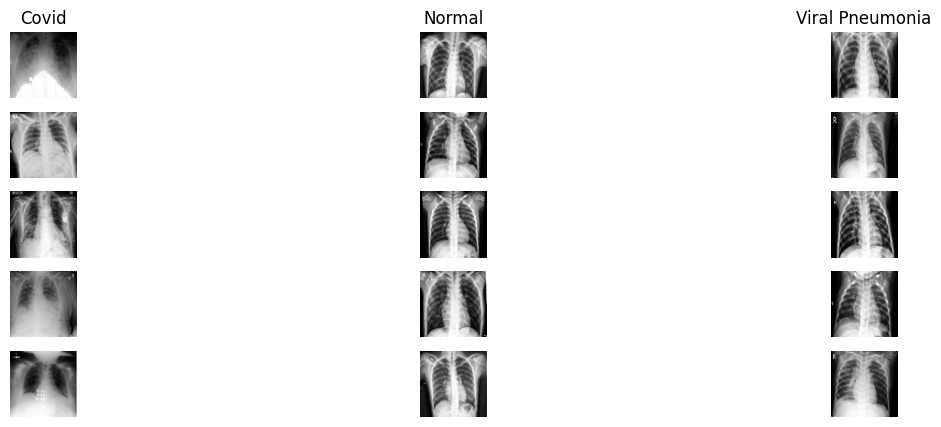

In [4]:
def show_samples(X, y, categories, samples_per_class=5):
    plt.figure(figsize=(15, 5))
    for idx, category in enumerate(categories):
        idxs = np.where(y == idx)[0]
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, img_idx in enumerate(idxs):
            plt_idx = i * len(categories) + idx + 1
            plt.subplot(samples_per_class, len(categories), plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 0:
                plt.title(category)
    plt.show()

show_samples(X_train, y_train, categories)

In [5]:
from collections import Counter

train_counts = Counter(y_train)
test_counts = Counter(y_test)

print("Train Set Size per Class:")
for idx, category in enumerate(categories):
    print(f"{category}: {train_counts[idx]} images")

print("\nTest Set Size per Class:")
for idx, category in enumerate(categories):
    print(f"{category}: {test_counts[idx]} images")

Train Set Size per Class:
Covid: 111 images
Normal: 70 images
Viral Pneumonia: 70 images

Test Set Size per Class:
Covid: 26 images
Normal: 20 images
Viral Pneumonia: 20 images


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
#Pre Processing
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# 1. Normalize pixel values (already done earlier)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 2. Encode class labels
# Option A: One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=len(categories))
y_test_cat = to_categorical(y_test, num_classes=len(categories))

# (OR) Option B: LabelEncoder (useful if you want integer labels only)
# encoder = LabelEncoder()
# y_train_enc = encoder.fit_transform(y_train)
# y_test_enc = encoder.transform(y_test)

# 3. Split training into train + validation (80-20 split)
X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42, stratify=y_train
)

# Check shapes
print("Train set:", X_train.shape, y_train_cat.shape)
print("Validation set:", X_val.shape, y_val_cat.shape)
print("Test set:", X_test.shape, y_test_cat.shape)



Train set: (200, 128, 128, 3) (200, 3)
Validation set: (51, 128, 128, 3) (51, 3)
Test set: (66, 128, 128, 3) (66, 3)


/tmp/ipython-input-146387513.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=[train_counts[i] for i in range(len(categories))], ax=ax[0], palette="Blues")
/tmp/ipython-input-146387513.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=[val_counts[i] for i in range(len(categories))], ax=ax[1], palette="Greens")
/tmp/ipython-input-146387513.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=[test_counts[i] for i in range(len(categories))], ax=ax[2], palette="Oranges")


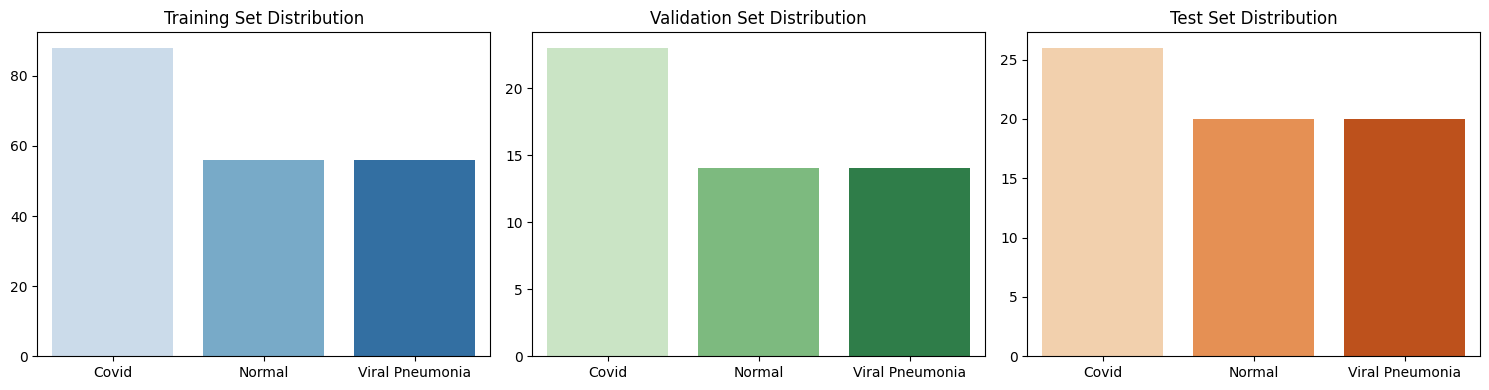

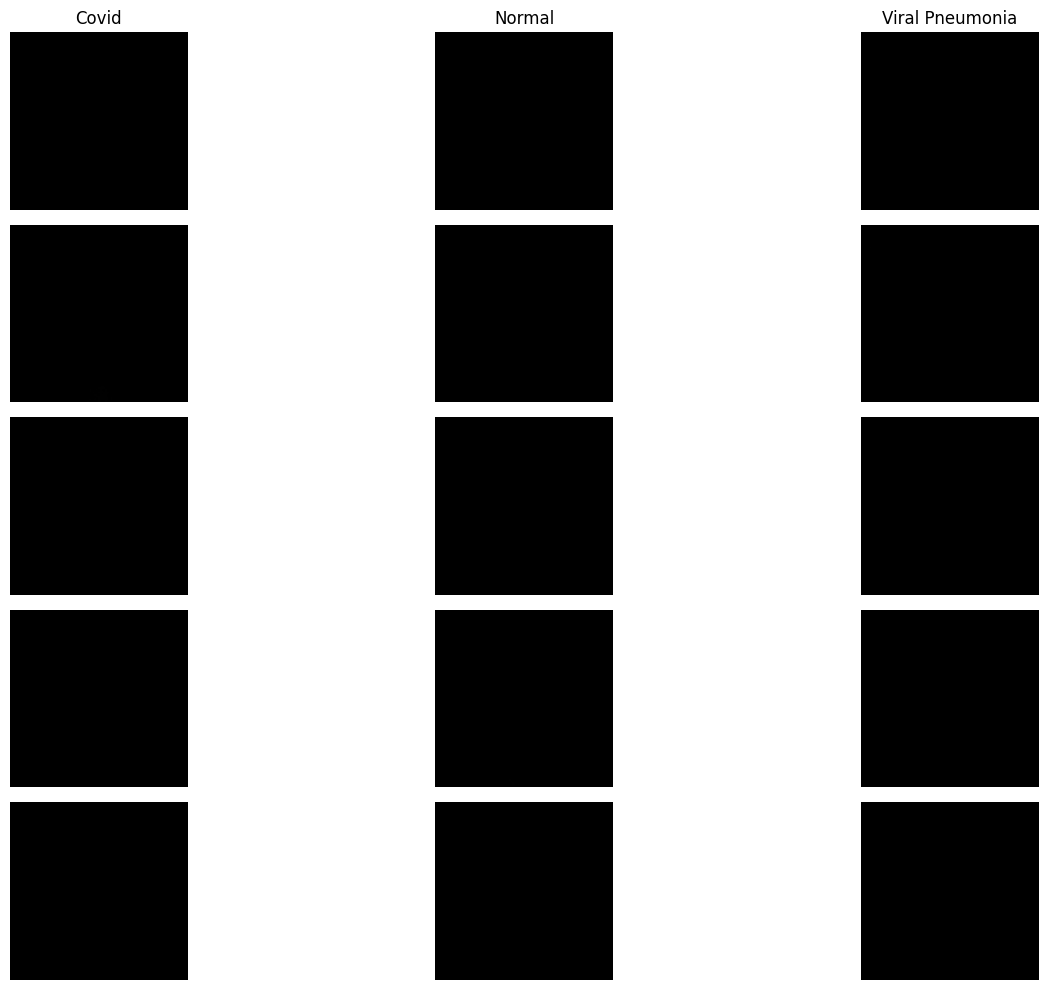

Image shape: (128, 128, 3)
Pixel value range: 0.0 to 0.00392156862745098


In [8]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# -----------------------------
# 1. Visualize Class Distribution
# -----------------------------
train_counts = Counter(np.argmax(y_train_cat, axis=1))
val_counts   = Counter(np.argmax(y_val_cat, axis=1))
test_counts  = Counter(np.argmax(y_test_cat, axis=1))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Train distribution
sns.barplot(x=categories, y=[train_counts[i] for i in range(len(categories))], ax=ax[0], palette="Blues")
ax[0].set_title("Training Set Distribution")

# Validation distribution
sns.barplot(x=categories, y=[val_counts[i] for i in range(len(categories))], ax=ax[1], palette="Greens")
ax[1].set_title("Validation Set Distribution")

# Test distribution
sns.barplot(x=categories, y=[test_counts[i] for i in range(len(categories))], ax=ax[2], palette="Oranges")
ax[2].set_title("Test Set Distribution")

plt.tight_layout()
plt.show()

# -----------------------------
# 2. Plot Sample Images
# -----------------------------
def show_samples(X, y, categories, samples_per_class=5):
    num_classes = len(categories)
    plt.figure(figsize=(15, samples_per_class * 2))

    for class_idx, category in enumerate(categories):
        idxs = np.where(np.argmax(y, axis=1) == class_idx)[0]
        idxs = np.random.choice(idxs, samples_per_class, replace=False)

        for i, img_idx in enumerate(idxs):
            plt_idx = i * num_classes + class_idx + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 0:
                plt.title(category)

    plt.tight_layout()
    plt.show()

# Show samples from training set
show_samples(X_train, y_train_cat, categories)

# -----------------------------
# 3. Observe patterns
# -----------------------------
print("Image shape:", X_train[0].shape)
print("Pixel value range:", X_train.min(), "to", X_train.max())


In [10]:
#Model 1 CNN
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

IMG_SHAPE = X_train.shape[1:]  # e.g., (128, 128, 3)
NUM_CLASSES = y_train_cat.shape[1]

def build_basic_cnn(input_shape=IMG_SHAPE, num_classes=NUM_CLASSES):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

basic_cnn = build_basic_cnn()
es = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint('basic_cnn.keras', monitor='val_accuracy', save_best_only=True)

history_basic = basic_cnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=10,
    batch_size=32,
    callbacks=[es, ckpt],
    verbose=1
)

print("Basic CNN test performance:", basic_cnn.evaluate(X_test, y_test_cat, verbose=0))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4027 - loss: 1.0959 - val_accuracy: 0.4510 - val_loss: 1.0703
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4191 - loss: 1.0883 - val_accuracy: 0.4510 - val_loss: 1.0686
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4468 - loss: 1.0753 - val_accuracy: 0.4510 - val_loss: 1.0703
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4098 - loss: 1.0794 - val_accuracy: 0.4510 - val_loss: 1.0750
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4268 - loss: 1.0759 - val_accuracy: 0.4510 - val_loss: 1.0554
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4357 - loss: 1.0760 - val_accuracy: 0.4510 - val_loss: 1.0129
Basic CNN test performance: [1.0934041738510132, 0.39393940567970276]


In [11]:
#Model 2 VGG16
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre

BACKBONE = 'vgg16'  # change to 'resnet50' to switch

def build_transfer_model(backbone='vgg16', input_shape=IMG_SHAPE, num_classes=NUM_CLASSES, train_base=False):
    if backbone == 'vgg16':
        base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
        preprocess = vgg_pre
    else:
        base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
        preprocess = resnet_pre

    # Optionally freeze the base model first
    base.trainable = train_base  # False for feature extraction; True for fine-tuning

    inputs = layers.Input(shape=input_shape)
    x = layers.Lambda(preprocess)(inputs)   # match ImageNet preprocessing
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 1) Feature extraction (freeze base)
transfer_model = build_transfer_model(BACKBONE, IMG_SHAPE, NUM_CLASSES, train_base=False)
es = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint('transfer_fe.keras', monitor='val_accuracy', save_best_only=True)

history_fe = transfer_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=10,
    batch_size=32,
    callbacks=[es, ckpt],
    verbose=1
)

# 2) Fine-tune last few layers
# Unfreeze last N layers of the base model
N = 10  # tune this
for layer in transfer_model.layers:
    if isinstance(layer, tf.keras.Model):  # the base
        for l in layer.layers[:-N]:
            l.trainable = False
        for l in layer.layers[-N:]:
            l.trainable = True

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

ckpt_ft = callbacks.ModelCheckpoint('transfer_ft.keras', monitor='val_accuracy', save_best_only=True)
history_ft = transfer_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=10,
    batch_size=32,
    callbacks=[es, ckpt_ft],
    verbose=1
)

print("Transfer model test performance:", transfer_model.evaluate(X_test, y_test_cat, verbose=0))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 62s 9s/step - accuracy: 0.4526 - loss: 4.1129 - val_accuracy: 0.4510 - val_loss: 3.9251
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.3836 - loss: 4.4824 - val_accuracy: 0.4510 - val_loss: 3.8551
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.4115 - loss: 4.2862 - val_accuracy: 0.4510 - val_loss: 3.7842
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.4418 - loss: 4.1812 - val_accuracy: 0.4510 - val_loss: 3.7156
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.3707 - loss: 4.9678 - val_accuracy: 0.4510 - val_loss: 3.6428
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.4007 - loss: 4.0808 - val_accuracy: 0.4510 - val_loss: 3.5721
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 93s 13s/step - accuracy: 0.4101 - loss: 3.9148 - val_accuracy: 0.4510 - val_loss: 1.7856
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - accuracy: 0.4249 - loss: 1.9

In [ ]:
#Model 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Choose preprocessing consistent with the backbone
if BACKBONE == 'vgg16':
    pre_fn = vgg_pre
else:
    pre_fn = resnet_pre

train_aug = ImageDataGenerator(
    preprocessing_function=pre_fn,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_aug = ImageDataGenerator(preprocessing_function=pre_fn)
test_aug = ImageDataGenerator(preprocessing_function=pre_fn)

batch_size = 32
train_gen = train_aug.flow(X_train, y_train_cat, batch_size=batch_size, shuffle=True)
val_gen   = val_aug.flow(X_val,   y_val_cat,   batch_size=batch_size, shuffle=False)
test_gen  = test_aug.flow(X_test, y_test_cat,  batch_size=batch_size, shuffle=False)

# Rebuild (or reload) a transfer model; start with base frozen for stability
aug_model = build_transfer_model(BACKBONE, IMG_SHAPE, NUM_CLASSES, train_base=False)

es = callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint('transfer_aug_fe.keras', monitor='val_accuracy', save_best_only=True)

history_aug_fe = aug_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[es, ckpt],
    verbose=1
)

# Optional: fine-tune a bit with a smaller LR
for layer in aug_model.layers:
    if isinstance(layer, tf.keras.Model):
        for l in layer.layers[-20:]:
            l.trainable = True

aug_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ckpt2 = callbacks.ModelCheckpoint('transfer_aug_ft.keras', monitor='val_accuracy', save_best_only=True)
history_aug_ft = aug_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[es, ckpt2],
    verbose=1
)

print("Augmented transfer model test performance:", aug_model.evaluate(test_gen, verbose=0))


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.2359 - loss: 7.8762 - val_accuracy: 0.2745 - val_loss: 4.9040
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.4205 - loss: 6.6102 - val_accuracy: 0.2745 - val_loss: 4.8207
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.3312 - loss: 7.1484 - val_accuracy: 0.2745 - val_loss: 4.7174
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.2765 - loss: 7.1488 - val_accuracy: 0.2745 - val_loss: 4.6333
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.3020 - loss: 7.4726 - val_accuracy: 0.2745 - val_loss: 4.5401
Epoch 6/10
3/7 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.4056 - loss: 6.1289

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_test, y_test_cat, categories, model_name="Model"):
    """
    Evaluates a trained Keras model on the test set.
    """
    # 1. Accuracy
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"\n📊 {model_name} Test Accuracy: {acc:.4f}")

    # 2. Predictions
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_cat, axis=1)

    # 3. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # 4. Classification Report
    print(f"\n🔍 {model_name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=categories))

    # 5. ROC-AUC (multi-class)
    try:
        auc = roc_auc_score(y_test_cat, y_pred_probs, multi_class='ovr')
        print(f"🔥 {model_name} ROC-AUC (OvR): {auc:.4f}")
    except Exception as e:
        print("ROC-AUC could not be computed:", e)

    # 6. Number of trainable parameters
    trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
    non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
    print(f"\nParameters in {model_name}:")
    print(f"Trainable: {trainable_params:,}")
    print(f"Non-trainable: {non_trainable_params:,}")

    return acc, cm


In [ ]:
def plot_history(history, model_name="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
# Evaluate Basic CNN
plot_history(history_basic, "Basic CNN")
evaluate_model(basic_cnn, X_test, y_test_cat, categories, "Basic CNN")

# Evaluate Transfer Learning
plot_history(history_fe, "Transfer Learning (Frozen)")
evaluate_model(transfer_model, X_test, y_test_cat, categories, "Transfer Learning")

# Evaluate Transfer + Augmentation
plot_history(history_aug_fe, "Transfer Learning + Augmentation")
evaluate_model(aug_model, X_test, y_test_cat, categories, "Transfer Learning + Augmentation")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(y, categories, title="Class Distribution"):
    plt.figure(figsize=(6,4))
    sns.countplot(x=y, palette="Set2")
    plt.xticks(range(len(categories)), categories)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

plot_class_distribution(y_train, categories, "Training Set Distribution")
plot_class_distribution(y_test, categories, "Test Set Distribution")


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Example usage in training
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=32,
    class_weight=class_weights
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example: augment only Covid class
covid_idxs = np.where(y_train == categories.index("Covid"))[0]
X_covid = X_train[covid_idxs]
y_covid = y_train_cat[covid_idxs]

augmented_images = []
augmented_labels = []

for i in range(1000):  # generate ~1000 synthetic images
    img = X_covid[i % len(X_covid)]
    img = img.reshape((1,) + img.shape)
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(y_covid[i % len(y_covid)])
        break  # one image per loop

X_train_balanced = np.concatenate([X_train, np.array(augmented_images)])
y_train_balanced = np.concatenate([y_train_cat, np.array(augmented_labels)])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,      # stop if no improvement for 5 epochs
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_cnn_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)


In [ ]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(
        filters=hp.Choice('filters', values=[32, 64, 128]),
        kernel_size=hp.Choice('kernel_size', values=[3,5]),
        activation='relu',
        input_shape=(128,128,3)
    ))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(
        filters=hp.Choice('filters2', values=[32, 64, 128]),
        kernel_size=3,
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(
        units=hp.Int('units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))

    model.add(layers.Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(layers.Dense(3, activation='softmax'))

    model.compile(
        optimizer=kt.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,     # number of different configs to try
    executions_per_trial=2,
    directory='cnn_tuning',
    project_name='covid19_classification'
)

tuner.search(X_train, y_train_cat,
             validation_data=(X_val, y_val_cat),
             epochs=10,
             callbacks=[early_stop])

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters:", best_hyperparams.values)


In [ ]:
from sklearn.metrics import classification_report, f1_score

# Train accuracy
train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)

# Test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)

# Predictions for F1 score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

f1 = f1_score(y_true, y_pred_classes, average="weighted")


In [ ]:
def check_overfitting(history):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    if train_acc - val_acc > 0.05:  # gap > 5%
        return "Y"
    else:
        return "N"


In [ ]:
import pandas as pd

results = []

results.append({
    "Model": "CNN Basic",
    "Train Acc": train_acc_basic,
    "Test Acc": test_acc_basic,
    "F1 Score": f1_basic,
    "Overfitting (Y/N)": check_overfitting(history_basic)
})

results.append({
    "Model": "Deep CNN",
    "Train Acc": train_acc_deep,
    "Test Acc": test_acc_deep,
    "F1 Score": f1_deep,
    "Overfitting (Y/N)": check_overfitting(history_deep)
})

results.append({
    "Model": "ResNet50",
    "Train Acc": train_acc_resnet,
    "Test Acc": test_acc_resnet,
    "F1 Score": f1_resnet,
    "Overfitting (Y/N)": check_overfitting(history_resnet)
})

results.append({
    "Model": "VGG16",
    "Train Acc": train_acc_vgg,
    "Test Acc": test_acc_vgg,
    "F1 Score": f1_vgg,
    "Overfitting (Y/N)": check_overfitting(history_vgg)
})

df_results = pd.DataFrame(results)

# Find Best Model by Test Accuracy
best_model = df_results.loc[df_results['Test Acc'].idxmax()]
df_results.loc[len(df_results)] = {
    "Model": "Best Model",
    "Train Acc": best_model["Train Acc"],
    "Test Acc": best_model["Test Acc"],
    "F1 Score": best_model["F1 Score"],
    "Overfitting (Y/N)": best_model["Overfitting (Y/N)"]
}

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(data=df_results[:-1], x="Model", y="Test Acc")
plt.title("Model Comparison (Test Accuracy)")
plt.show()

df_results


In [ ]:
model.save("covid_best_model.h5")